In [2]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [11]:
def fonction(x):
    return 25.5+x**2-1.3*x**3
def derivee(x):
    return 2*x-1.3*3*x**2


#bisection
a=-100
b=100
n=100
for i in range(100):
    c=0.5*(b+a)
    if (fonction(a)*fonction(c)>0):
        a=c
    else:
        b=c
    print("a,b,c,value",a,b,c,fonction(c))
    if (abs(fonction(c))<0.0001):
        print("bisection number of iterations to converge",i)
        break

#Newton
xmin=-100
n=100
for i in range(100):
    delx = -1. * fonction(xmin)/derivee(xmin)
    
    xnext=xmin+delx
    print(xnext,fonction(xnext))
    
    if (abs(fonction(xnext))<0.0001):
        print("Newton number of iterations",i)
        break
    xmin=xnext
    

#Newton numerical derivative
def deriveen(x):
    dx=0.0001
    return (fonction(x+dx)-fonction(x-dx))*0.5/dx


xmin=-100
n=100
for i in range(100):
    delx = -1. * fonction(xmin)/deriveen(xmin)
    
    xnext=xmin+delx
    print(xnext,fonction(xnext))
    
    if (abs(fonction(xnext))<0.0001):
        print("Newton numerical derivative number of iterations",i)
        break
    xmin=xnext

    
#secant
x1=-100.
x2=-99.999

n=100

for i in range(n):
    
    xnext = x2 - fonction(x2)*(x2-x1)/(fonction(x2)-fonction(x1))
    print(xnext,fonction(xnext))
    
    if (abs(fonction(xnext))<0.0001):
        print("Secant number of iterations:",i)
        break
    x1=x2
    x2=xnext

a,b,c,value 0.0 100 0.0 25.5
a,b,c,value 0.0 50.0 50.0 -159974.5
a,b,c,value 0.0 25.0 25.0 -19662.0
a,b,c,value 0.0 12.5 12.5 -2357.3125
a,b,c,value 0.0 6.25 6.25 -252.8203125
a,b,c,value 0.0 3.125 3.125 -4.4072265625
a,b,c,value 1.5625 3.125 1.5625 22.9822998046875
a,b,c,value 2.34375 3.125 2.34375 14.256179809570312
a,b,c,value 2.734375 3.125 2.734375 6.39909553527832
a,b,c,value 2.9296875 3.125 2.9296875 1.393646478652954
a,b,c,value 2.9296875 3.02734375 3.02734375 -1.403729885816574
a,b,c,value 2.978515625 3.02734375 2.978515625 0.02026931568980217
a,b,c,value 2.978515625 3.0029296875 3.0029296875 -0.6853457777760923
a,b,c,value 2.978515625 2.99072265625 2.99072265625 -0.33094919827999547
a,b,c,value 2.978515625 2.984619140625 2.984619140625 -0.15494356986164348
a,b,c,value 2.978515625 2.9815673828125 2.9815673828125 -0.06723814507222414
a,b,c,value 2.978515625 2.98004150390625 2.98004150390625 -0.023459683043370205
a,b,c,value 2.978515625 2.979278564453125 2.979278564453125 -0.001

I converged in 60
1.2278764758954375 -0.47218772023815064 2.726239526060194
     fun: 2.7262357062485583
     jac: array([-4.77785346e-06,  3.21124685e-05])
 message: 'Optimization terminated successfully.'
    nfev: 31
     nit: 12
    njev: 31
  status: 0
 success: True
       x: array([ 1.22781411, -0.47173631])
      fun: 2.7262357032570135
 hess_inv: array([[0.17796401, 0.00144575],
       [0.00144575, 0.02765236]])
      jac: array([-1.90116661e-05, -4.01512891e-05])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 27
     njev: 32
   status: 0
  success: True
        x: array([ 1.22781165, -0.47173827])
[[10.         20.        ]
 [ 9.98624667 17.03448   ]
 [ 9.96982719 14.7800536 ]
 [ 9.95024444 12.96726117]
 [ 9.92691701 11.45831803]
 [ 9.89916846 10.17286361]
 [ 9.86621677  9.05975265]
 [ 9.82716482  8.08430163]
 [ 9.78099314  7.22181095]
 [ 9.72655641  6.45398578]
 [ 9.66258609  5.76682768]
 [ 9.58770175  5.14932852]
 [ 9.50043417  4.59262775]
 [ 9

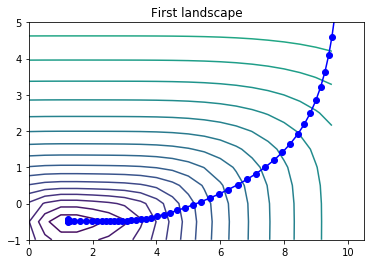

In [4]:
def myfunc(x,y):
    f=0.5*x**2+5.*y**2+0.666*(x-2)**4+8*(y+1)**4
   
    return f
    
def dfdx(x,y):
    dfdx=x+8./3*(x-2)**3
    return dfdx

def dfdy(x,y):
    dfdy=10*y+32*(y+1)**3
    return dfdy
    
    
def steepestDescent(x0,y0):
     
    
    x=x0
    y=y0
    fbefore=myfunc(x,y)
    gamma=0.00001

    trajectory=[np.array([x,y])]
    for i in range(1000):
        dx=gamma*dfdx(x,y)
        x-=dx
        dy=gamma*dfdy(x,y)
        y-=dy
        fafter=myfunc(x,y)
        #print(fbefore,fafter,gamma)
        trajectory.append(np.array([x,y]))
        if(fafter<fbefore):
            gamma=gamma*1.2
            if(abs(fafter-fbefore)<0.0001):
                print("I converged in",i)
                break
        else:
            gamma=gamma*0.5
        fbefore=fafter
        


    return(x,y,myfunc(x,y),trajectory)

#steepest descent
xopt,yopt,fopt,trajectory=steepestDescent(10,20)
print(xopt,yopt,fopt)


def MyFunc(x):
    f=0.5*x[0]**2+5.*x[1]**2+0.666*(x[0]-2)**4+8*(x[1]+1)**4
    return f

def gradient(x):
    dfdx=x[0]+8./3*(x[0]-2)**3
    dfdy=10*x[1]+32*(x[1]+1)**3
    gradient=np.array([dfdx,dfdy])
    return gradient


x0 = [10., 20.]
res = minimize(MyFunc, x0, method='CG', jac=gradient, tol=0.0001)
print(res)

x0 = [10., 20.]
res = minimize(MyFunc, x0, method='BFGS',jac=gradient, tol=0.0001)
print(res)



delta = 0.5
x = np.arange(0, 10, delta)
y = np.arange(-1, 20, delta)
X, Y = np.meshgrid(x, y)

Z=X.copy()

for i in range(len(Z)):
    for j in range(len(Z[i])):
        Z[i][j]=np.log(myfunc(X[i][j],Y[i][j]))



fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z,30)
#ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('First landscape')
traj=np.array(trajectory)
print(traj)
plt.ylim([-1,5])
plt.plot(traj[:,0],traj[:,1],'bo-')

